<a href="https://colab.research.google.com/github/khatana706/DATA-SCIENCE/blob/main/GPU_bench_marking_with_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')

In [4]:
#tf.config.experimental.set_memory_growth(physical_devices['0'], True)

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
 x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(x_train[index])

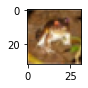

In [12]:
plot_sample(0)

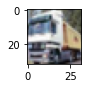

In [13]:
plot_sample(1)

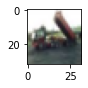

In [14]:
plot_sample(2)

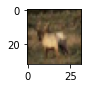

In [15]:
plot_sample(3)

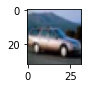

In [16]:
plot_sample(4)

In [17]:
classes = ['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']

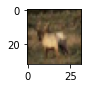

In [18]:
plot_sample(3)

In [19]:
y_train[3]

array([4], dtype=uint8)

In [20]:
classes[y_train[3][0]]

'dear'

In [21]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [23]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [24]:
x_test_scaled.shape

(10000, 32, 32, 3)

In [25]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [26]:
y_train_categorical = keras.utils.to_categorical(
y_train, num_classes=10, dtype = 'float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
y_test_categorical = keras.utils.to_categorical(
y_test, num_classes=10, dtype = 'float32')
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [29]:
32*32*3

3072

In [30]:
model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(32,32,3)),
                           keras.layers.Dense(3000, activation='relu'),
                           keras.layers.Dense(1000, activation='relu'),
                           keras.layers.Dense(10,  activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#model compiler

In [31]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [32]:
model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 5ms/step - loss: 1.8092 - accuracy: 0.3555
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6239 - accuracy: 0.4276
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5393 - accuracy: 0.4572
Epoch 4/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4796 - accuracy: 0.4759
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4295 - accuracy: 0.4968
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3861 - accuracy: 0.5112
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3467 - accuracy: 0.5268
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3125 - accuracy: 0.5390
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2817 - accuracy: 0.5467
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.24

In [33]:
model.predict(x_test_scaled)[0]

array([3.5949558e-01, 2.1201283e-01, 9.4796646e-01, 9.9854678e-01,
       9.9367392e-01, 9.5255524e-01, 1.0205321e-02, 2.9808661e-04,
       4.0588668e-01, 1.3482730e-01], dtype=float32)

In [34]:
model.predict(x_test_scaled, y_test[0][0])


array([[3.5949558e-01, 2.1201257e-01, 9.4796634e-01, ..., 2.9808687e-04,
        4.0588668e-01, 1.3482724e-01],
       [8.9956081e-01, 9.9190044e-01, 3.4508258e-01, ..., 2.0278816e-01,
        9.9959725e-01, 9.7980177e-01],
       [9.9617696e-01, 8.5614061e-01, 4.9947307e-01, ..., 8.9923865e-01,
        9.8146522e-01, 8.9633238e-01],
       ...,
       [2.2570758e-01, 1.7647074e-03, 9.8907965e-01, ..., 2.6775306e-01,
        2.2385620e-01, 2.2276239e-01],
       [9.2811197e-02, 8.8711036e-03, 8.4614843e-01, ..., 1.6131647e-01,
        7.9437224e-03, 2.2361325e-02],
       [4.9034187e-01, 3.6775835e-02, 8.0535716e-01, ..., 9.9718082e-01,
        1.5983610e-01, 2.9594672e-01]], dtype=float32)

In [35]:
classes[y_test[0][0]]

'cat'

In [36]:
#np.argmax(model.predict(x_test_scaled, y_test[1][]))

In [37]:
np.argmax(model.predict(x_test_scaled)[0])

3

In [38]:
model.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6383 - accuracy: 0.5548


[1.6383389234542847, 0.5547999739646912]

In [39]:
def get_model():
  model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(32,32,3)),
                           keras.layers.Dense(3000, activation='relu'),
                           keras.layers.Dense(1000, activation='relu'),
                           keras.layers.Dense(10,  activation='sigmoid')
      ])
  model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']) 
  
  return model  

In [40]:
with tf.device("/CPU:0"):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 90s 57ms/step - loss: 1.8117 - accuracy: 0.3545
Epoch 2/2
1563/1563 [==============================] - 87s 55ms/step - loss: 1.6241 - accuracy: 0.4273


In [41]:
%timeit -n1 -r1
with tf.device("/CPU:0"):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.8091 - accuracy: 0.3543
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6218 - accuracy: 0.4281
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5429 - accuracy: 0.4557
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4813 - accuracy: 0.4790
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4329 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.3925 - accuracy: 0.5094
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3522 - accuracy: 0.5275
Epoch 8/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3174 - accuracy: 0.5380
Epoch 9/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.2826 - accuracy: 0.5518
Epoch 10/10
1563/1563 [==============================] - 84s 54m

In [43]:
#lets measure training time on a GPU 

In [44]:
%timeit -n1 -r1
with tf.device("/GPU:0"):
  gpu_model = get_model()
  gpu_model.fit(x_train_scaled, y_train_categorical, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8103 - accuracy: 0.3543
Epoch 2/2
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6235 - accuracy: 0.4273


In [45]:
%timeit -n1 -r1
with tf.device("/GPU:0"):
  gpu_model = get_model()
  gpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8138 - accuracy: 0.3524
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6240 - accuracy: 0.4269
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5424 - accuracy: 0.4542
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4818 - accuracy: 0.4777
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4338 - accuracy: 0.4948
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3908 - accuracy: 0.5115
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3515 - accuracy: 0.5252
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3148 - accuracy: 0.5359
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2837 - accuracy: 0.5460
Epoch 10/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.251